In [1]:
import pandas as pd
companies = pd.read_csv('companies_d.csv', encoding = "ISO-8859-1")
rounds = pd.read_csv('rounds2.csv', encoding = "ISO-8859-1")
companies.head()  # TO PRINT 5 RECORDS
rounds.head()    # TO PRINT 5 RECORDS


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [2]:
#1 How many unique companies are present in rounds2?
rounds['company_permalink'].nunique()  # TO COUNT THE UNIQUE VALUES OF company_permalink  COLUMNN


90247

In [3]:
#2 How many unique companies are present in companies?
companies['company_permalink'].nunique()  # TO COUNT THE UNIQUE VALUES OF company_permalink  COLUMNN



18334

In [2]:
#3  In the companies data frame, which column can be used as the unique key for each company? 
#Write the name of the column.

#Company_permalink

In [2]:
companies['company_permalink'] = companies['company_permalink'].str.lower()
companies.head()
print(companies.shape)
rounds['company_permalink'] = rounds['company_permalink'].str.lower()
rounds.head()
print(rounds.shape)
# 4 Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
master_frame_pre = pd.merge(companies, rounds, on='company_permalink', how='inner')
master_frame_pre.shape


a=[]

### or 

for i in rounds["company_permalink"]:
    #print(i)
    if i not in companies["company_permalink"]:
        #print(i)
        a.append(i)

len(a)


# yes 

(18334, 10)
(114949, 6)


114949

In [14]:
#How many observations are present in master_frame
master_frame_pre = pd.merge(companies, rounds, on='company_permalink', how='inner')
master_frame_pre.shape  # 32082

(32082, 15)

In [3]:
# person want to invest 5 to 15 million and i have to search best ivestement tpye for my client
budget=master_frame_pre.query("5000000<=raised_amount_usd<=15000000")# 5526 rows × 15 columns


budget=master_frame_pre.query('raised_amount_usd >=5000000 and raised_amount_usd <= 15000000')#5526 rows × 15 columns

budget

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0
21,/organization/1-800-publicrelations-inc-,"1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,Internet Marketing|Media|Public Relations,operating,USA,NY,New York City,New York,24-10-2013,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,NaN,01-02-2015,6000000.0
22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0
46,/organization/1001-menus,ZenChef,http://zenchef.com/en/,Local Businesses|Restaurants,operating,FRA,A8,Paris,Paris,20-11-2010,/funding-round/645b4cd895450b8e0268027cd7813047,venture,B,04-11-2015,6602694.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32062,/organization/enova-systems,Enova Systems,http://www.enovasystems.com,Clean Technology,operating,USA,CA,Los Angeles,Torrance,NaN,/funding-round/540b8429d00b0a6ebb558f50fd989d71,venture,NaN,23-12-2009,9024960.0
32065,/organization/enovance,eNovance,http://enovance.com/en,Cloud Computing|Open Source|Software,acquired,FRA,A8,Paris,Paris,01-01-2008,/funding-round/3a03f8b1deedf1a15935b0e28905d456,debt_financing,NaN,09-07-2013,7699316.0
32070,/organization/enow,eNow,http://www.enow.com,Technology,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/95276c5d98ada233215f8b5c216e35c8,venture,C,24-09-2001,9450000.0
32073,/organization/enphase-energy,Enphase Energy,http://www.enphaseenergy.com,Clean Technology|Semiconductors,ipo,USA,CA,Napa Valley,Petaluma,01-01-2006,/funding-round/be2a7f8b21fb8b492c71fe1bdd650aa1,venture,NaN,24-06-2011,14000000.0


funding_round_type
venture                  4.354535e+10
debt_financing           2.214785e+09
private_equity           1.120171e+09
undisclosed              5.596664e+08
post_ipo_equity          4.300936e+08
grant                    3.268383e+08
seed                     3.169696e+08
angel                    1.698296e+08
convertible_note         1.087865e+08
post_ipo_debt            9.597663e+07
equity_crowdfunding      5.432745e+07
product_crowdfunding     4.060552e+07
non_equity_assistance    1.500000e+07
secondary_market         1.219240e+07
Name: raised_amount_usd, dtype: float64


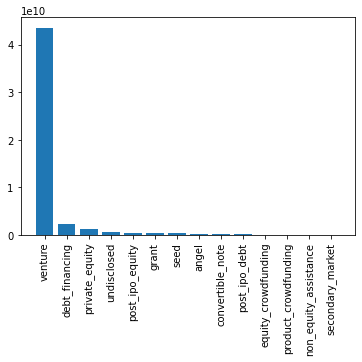

In [10]:
# 1.	Investment type analysis

#total ammount invested in each investment type

best_i=budget.groupby("funding_round_type")["raised_amount_usd"].sum().sort_values(ascending=False)
print(best_i)
import matplotlib.pyplot as plt
plt.bar(best_i.index,best_i.values)
plt.xticks(rotation=90)
plt.show()

In [11]:
# now i have fetch only records of venture investment type
bud_ven=budget.query("funding_round_type=='venture'")
bud_ven

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0
22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0
46,/organization/1001-menus,ZenChef,http://zenchef.com/en/,Local Businesses|Restaurants,operating,FRA,A8,Paris,Paris,20-11-2010,/funding-round/645b4cd895450b8e0268027cd7813047,venture,B,04-11-2015,6602694.0
50,/organization/1001pharmacies-com,1001pharmacies.com,http://www.1001pharmacies.com/,Cosmetics|Marketplaces,operating,FRA,A9,Montpellier,Montpellier,01-01-2012,/funding-round/a21fc4d20200f43e3a25fd9cfc7c1482,venture,A,09-07-2015,8900000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32052,/organization/enocean,EnOcean,http://www.enocean.com,Mobile|Wireless,operating,DEU,2,Oberhaching,Oberhaching,01-01-2001,/funding-round/dfefd9daae68b899afb7783ac7c4a532,venture,B,28-01-2004,5527720.0
32053,/organization/enocean,EnOcean,http://www.enocean.com,Mobile|Wireless,operating,DEU,2,Oberhaching,Oberhaching,01-01-2001,/funding-round/f298581be2bdc2b959325a1e62af4ee6,venture,NaN,15-12-2009,11632800.0
32062,/organization/enova-systems,Enova Systems,http://www.enovasystems.com,Clean Technology,operating,USA,CA,Los Angeles,Torrance,NaN,/funding-round/540b8429d00b0a6ebb558f50fd989d71,venture,NaN,23-12-2009,9024960.0
32070,/organization/enow,eNow,http://www.enow.com,Technology,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/95276c5d98ada233215f8b5c216e35c8,venture,C,24-09-2001,9450000.0


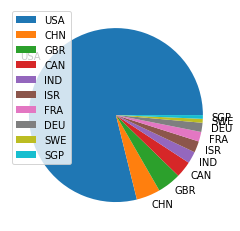

In [16]:
#2.	Country analysis- countries most heavily invested in the past

b_c=bud_ven.groupby("country_code")['company_permalink'].nunique().sort_values(ascending=False).head(10)


# companies which is located in USA country
#b_v_u=bud_ven.query("country_code=='USA'")
#b_v_u
b_c
plt.pie(b_c.values,labels=b_c.index)
plt.legend()
plt.show()

In [ ]:
#3.	Sector analysis- understanding the distribution of investments across the eight main sectors

In [13]:
companies['company_permalink'] = companies['company_permalink'].str.lower()
companies.head()
companies.shape
rounds['company_permalink'] = rounds['company_permalink'].str.lower()
rounds.head()
rounds.shape
master_frame_pre = pd.merge(companies, rounds, on='company_permalink', how='inner')
#master_frame_pre.to_csv('F:/ml/merged_companies_rounds.csv')
#df = pd.read_csv('F:/ml/merged_companies_rounds.csv',encoding="ISO-8859-1")
df.head()
df.shape
duplicate = df.duplicated()
#duplicate.to_csv('F:/ml/duplicate.csv')


NameError: name 'df' is not defined

In [5]:
df['funding_round_type'] = df['funding_round_type'].str.lower()
df.head()


,Unnamed: 0,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
df['funding_round_type'].value_counts().sort_values(ascending=False).head(10)


venture                15999
seed                    7966
debt_financing          2121
angel                   1516
undisclosed             1369
equity_crowdfunding      910
private_equity           654
grant                    623
convertible_note         504
post_ipo_equity          206
Name: funding_round_type, dtype: int64

In [7]:

df.groupby('funding_round_type')['raised_amount_usd'].sum().sort_values(ascending=False)


funding_round_type
venture                  1.660559e+11
private_equity           4.265228e+10
debt_financing           2.863777e+10
post_ipo_equity          2.856505e+10
undisclosed              9.944765e+09
post_ipo_debt            8.018193e+09
seed                     4.791158e+09
grant                    2.690026e+09
angel                    1.143716e+09
convertible_note         5.243080e+08
secondary_market         4.562362e+08
equity_crowdfunding      2.084155e+08
product_crowdfunding     1.419878e+08
non_equity_assistance    2.069153e+07
Name: raised_amount_usd, dtype: float64

In [8]:
budget_wise = df[(df.raised_amount_usd >= 5000000) & (df.raised_amount_usd <= 15000000)]


In [9]:
budget_wise['funding_round_type'].value_counts().sort_values(ascending=False).head(10)


venture             4875
debt_financing       268
private_equity       118
undisclosed           68
seed                  48
post_ipo_equity       47
grant                 38
angel                 23
convertible_note      15
post_ipo_debt         12
Name: funding_round_type, dtype: int64

In [10]:

budget_wise.groupby('funding_round_type')['raised_amount_usd'].sum().sort_values(ascending=False).head()
# #### Venture type investment has the highest number

funding_round_type
venture            4.354535e+10
debt_financing     2.214785e+09
private_equity     1.120171e+09
undisclosed        5.596664e+08
post_ipo_equity    4.300936e+08
Name: raised_amount_usd, dtype: float64

In [11]:
venture = df[df['funding_round_type'] == 'venture']
venture
budget_venture = budget_wise[budget_wise['funding_round_type'] == 'venture']



In [12]:
english_speaking_countries = ['BWA','CMR','ETH','ERI','GMB','GHA','KEN','LSO','LBR','MWI','MUS','NAM','nGA','RWA','SYC','SLE',
                              'ZAF','SSD','SDN','SWZ','TZA','UGA','ZMB','ZWE','The Bahamas','BRB','BLZ','CAN','DMA','GRD','GUY',
                              'JAM','Saint Lucia','USA','IND','PAK','PHL','SGP','FJI','AUS','KIR','MHL','FSM','NRU','UK','GBR',
                              'MLT','NZL','PLW','PNG','IRL','VUT','WSM','SLB','TON','TUV','ATG','KNA','TTO','VCT',                             ]

df['country_code'] = df['country_code'].str.upper()

budget_venture['country_code'] = budget_venture['country_code'].str.upper()

#companies_in_english_speaking_countries = pd.DataFrame()
# for i in df:
 #   if(i['country_code'].isin(english_speaking_countries)):
       #  companies_in_english_speaking_countries.append(i)

companies_in_english_speaking_countries = df[df.country_code.isin(english_speaking_countries)]

companies_in_english_speaking_countries

venture_plus_english = companies_in_english_speaking_countries[companies_in_english_speaking_countries['funding_round_type'] == 'venture']
venture_plus_english



C:\Users\123456\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
5,5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
8,8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
10,10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
11,11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0
12,12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0
22,22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0
28,28,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.0
33,33,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22-07-2013,NaN


In [13]:
budget_venture_companies_english_speaking = budget_venture[budget_venture.country_code.isin(english_speaking_countries)]
budget_venture_companies_english_speaking.head()
budget_venture_companies_english_speaking.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
high_investment_counteries = ['USA','GBR','CAN','IND','SGP','IRL','AUS','KEN']
top9 = budget_venture_companies_english_speaking[budget_venture_companies_english_speaking.country_code.isin(high_investment_counteries)]
top9
top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
top9['category_list'] = top9['category_list'].str.split('|').str.get(0)
top9.head(9)


C:\Users\123456\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
12,12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0
22,22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0
102,102,/organization/128-technology,128 Technology,http://www.128technology.com/,Service Providers,operating,USA,MA,Boston,Burlington,07-07-2014,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0
109,109,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.0
110,110,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.0
111,111,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/funding-round/786f61aa9866f4471151285f5c56be36,venture,A,03-02-2010,5150000.0
112,112,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/funding-round/82ace97530965cd2be8f262836b43ff5,venture,A,27-03-2008,12400000.0
113,113,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/funding-round/ab99fc5a53717b1b53fd6aa5687c5fa9,venture,B,16-12-2010,6000000.0


In [1]:
import pandas as pd
sector_mapping = pd.read_csv('mapping.csv')
sector_mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [19]:


## The dataset is in a wide format now, has to be converted from wide to long.
##For that we use pandas melt() function
df2=pd.melt(sector_mapping,id_vars=['category_list'],var_name='main_sector', value_name='value')
df2
mapp=df2.query('value==1')
mapp

,category_list,main_sector,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
...,...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising",1
6122,Social Television,"Social, Finance, Analytics, Advertising",1
6123,Social Travel,"Social, Finance, Analytics, Advertising",1
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [22]:
dff=pd.merge(mapp,b_v_u,on="category_list",how="inner")
dff

dff.groupby("main_sector")["company_permalink"].count().sort_values(ascending=False)


eightmainsector=dff.query('main_sector!="Automotive & Sports "')
eightmainsector

,category_list,main_sector,value,company_permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,Automotive,Automotive & Sports,1,/organization/additech,Additech,http://www.additech.com,operating,USA,TX,Houston,Houston,01-01-1995,/funding-round/c1c50ebc27ce45adbdd21e0b121fd23a,venture,NaN,09-08-2006,6000000.0
1,Automotive,Automotive & Sports,1,/organization/aptera,Aptera,http://www.aptera.com,closed,USA,CA,San Diego,Carlsbad,01-01-2003,/funding-round/74dc54cf94102e9620e19a561104ba2b,venture,NaN,15-04-2010,9800000.0
2,Automotive,Automotive & Sports,1,/organization/car-advisory-network,Car Advisory Network,http://www.caradvisorynetwork.com,operating,USA,CA,SF Bay Area,Palo Alto,NaN,/funding-round/4389fc22516113fbf1a33c6e1262b505,venture,A,17-03-2008,6500000.0
3,Automotive,Automotive & Sports,1,/organization/catalytic-solutions,Catalytic Solutions,https://www.catsolns.com,operating,USA,CA,Santa Barbara,Oxnard,01-01-1994,/funding-round/cc0443191d8a3aeac7adbb885b904943,venture,NaN,03-11-2004,10000000.0
4,Automotive,Automotive & Sports,1,/organization/delphi,Delphi,http://www.delphi.com,ipo,USA,MI,Detroit,Troy,01-01-2009,/funding-round/3fc379fe0b42bbcd9839a6c29b9b3ac1,venture,NaN,13-06-2008,8000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,Public Relations,"Social, Finance, Analytics, Advertising",1,/organization/divinetworks,DiViNetworks,http://www.divinetworks.com,operating,USA,FL,Miami,Miami Beach,01-01-2004,/funding-round/e1ff937cc933f356213bdee04ad273d1,venture,NaN,16-09-2013,5000000.0
1904,Retail,"Social, Finance, Analytics, Advertising",1,/organization/draper-james,Draper James,http://www.draperjames.com/,operating,USA,NY,New York City,New York,NaN,/funding-round/523a2172e3ce8dcc4d540a8c255dc373,venture,B,02-10-2015,10000000.0
1905,Social Media,"Social, Finance, Analytics, Advertising",1,/organization/academia-edu,Academia.edu,http://Academia.edu,operating,USA,CA,SF Bay Area,San Francisco,01-09-2008,/funding-round/9c6aa8ce08c5458b665d39d3eed4ac5b,venture,B,26-09-2013,11100000.0
1906,Social Media,"Social, Finance, Analytics, Advertising",1,/organization/ad-ly,Adly,http://ad.ly,operating,USA,CA,Los Angeles,Beverly Hills,01-01-2009,/funding-round/5b8d3ce4710179e20c6649bf8d4c4d51,venture,B,11-05-2010,5000000.0


In [15]:
#df2 = df2[df2.value != 0]
df2
#df2 = df2.drop('value',axis=1)
df2.head()
#df2 = df2.reset_index()
df2.head()
df2 = df2.drop('index',axis=1)
df2
df2

ValueError: labels ['index'] not contained in axis